In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

In [34]:
def comprehend_polar(name, sep=" "):
    points = {}
    with open(name) as file:

        for line in file:
            entries = line.strip().split()
            # make sure it is a line with data
            try:
                float(entries[0])
                float(entries[-1])
            except:
                continue

            t_dic = {
                "alpha": float(entries[0]),
                "CL": float(entries[1]),
                "CD": float(entries[2]),
                "CDp": float(entries[3]),
                "Cm": float(entries[4]),
                "X_tt": float(entries[5]),
                "X_tb": float(entries[6]),
            }
            points[str(float(entries[0]))] = t_dic
    return points

def comprehend_bl(name, sep=" "):
    points = {}
    with open(name) as file:

        for line in file:
            entries = line.strip().split()
            # make sure it is a line with data
            try:
                float(entries[0])
                float(entries[-1])
            except:
                continue

            t_dic = {
                "s": float(entries[0]),
                "x": float(entries[1]),
                "y": float(entries[2]),
                "Ue": float(entries[3]),
                "Dstar": float(entries[4]),
                "Theta": float(entries[5]),
                "cf": float(entries[6]),
                "H": float(entries[7]),

            }
            points[str(float(entries[0]))] = t_dic
    return points

In [86]:
naca = comprehend_polar("naca")
kt = comprehend_polar("polar")

In [82]:
def plot(x, y, polar1, polar2):
    plt.plot([polar1[k][x] for k in polar1.keys()], [polar1[k][y] for k in polar1.keys()])
    plt.plot([polar2[k][x] for k in polar2.keys()], [polar2[k][y] for k in polar2.keys()], label="kt")
    plt.xlabel(x)
    plt.ylabel(y)

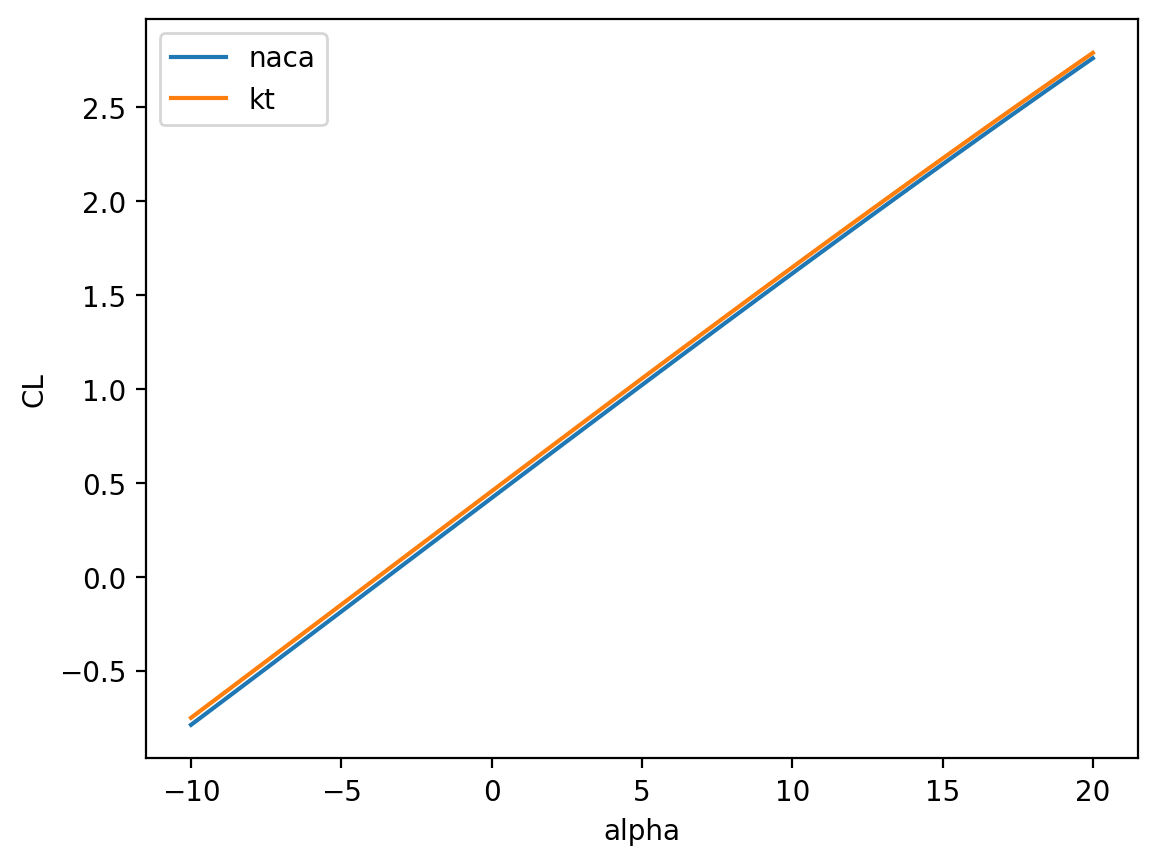

In [92]:
plot("alpha", "CL", naca, kt)
plt.legend(["naca", "kt"])
plt.savefig("xfoil_cla.png")

In [115]:
180/np.pi * np.mean(np.gradient([kt[i]["CL"] for i in kt.keys()], [kt[i]["alpha"] for i in kt.keys()]))

6.759586997440134

In [118]:
180/np.pi * np.mean(np.gradient([naca[i]["CL"] for i in naca.keys()], [naca[i]["alpha"] for i in naca.keys()]))

6.776775731294059

In [117]:
2*np.pi

6.283185307179586

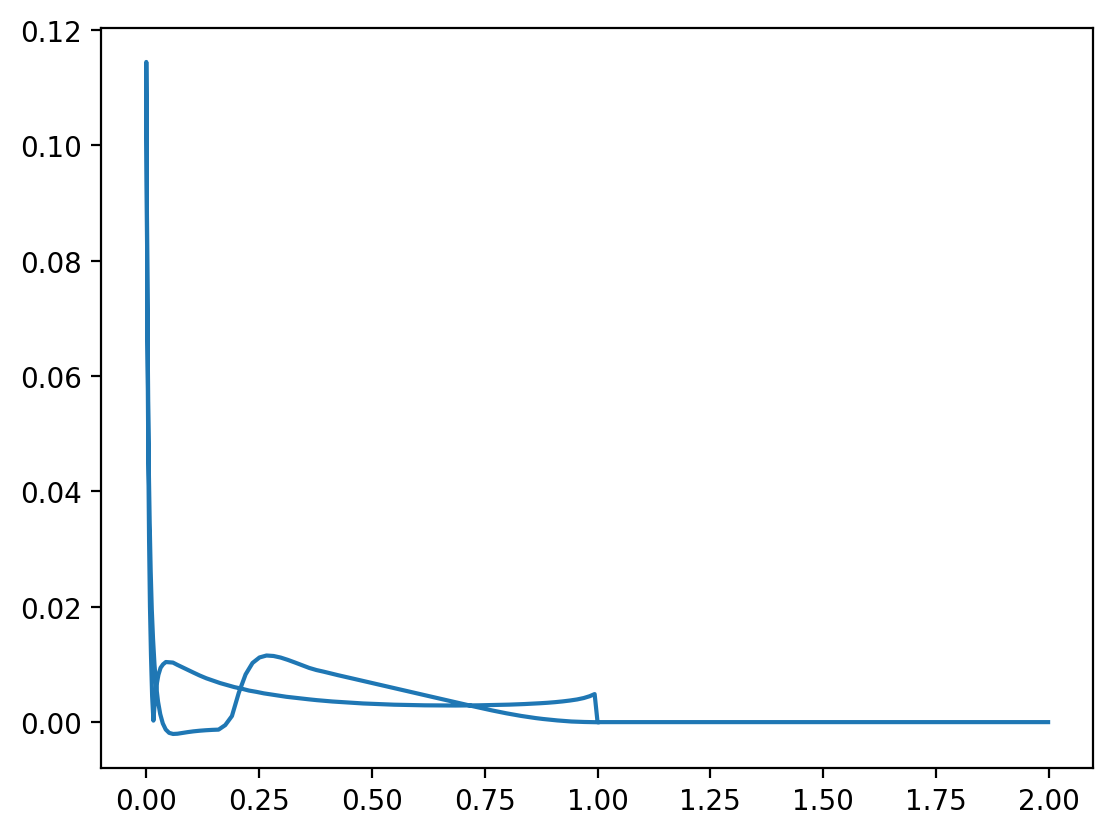

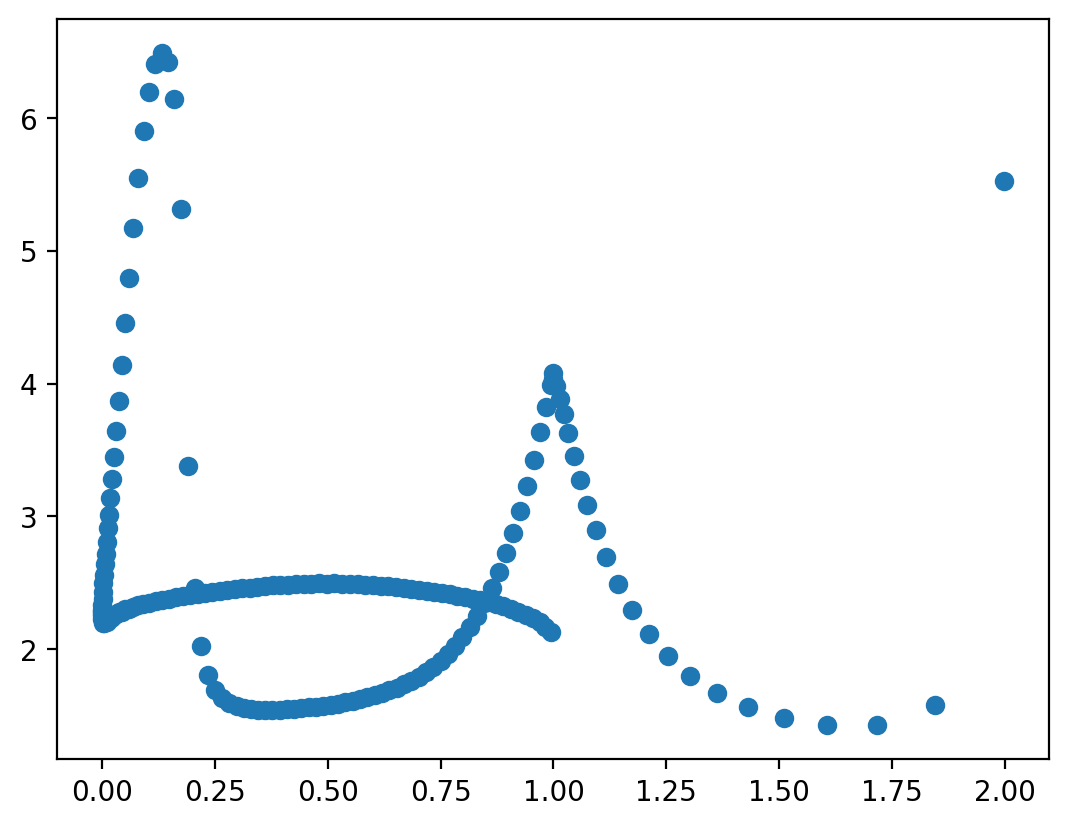

In [63]:
naca_low = comprehend_bl("naca_low_3")
naca_polar_low = comprehend_polar("naca_low_polar")
cf = []
h = []
for key in naca_low.keys():
    cf.append([naca_low[key]['x'], naca_low[key]['cf']])
    h.append([naca_low[key]['x'], naca_low[key]['H']])
    ds

cf=np.array(cf)
plt.plot(cf[:,0], cf[:,1])
plt.figure()
h=np.array(h)
plt.scatter(h[:,0], h[:,1])

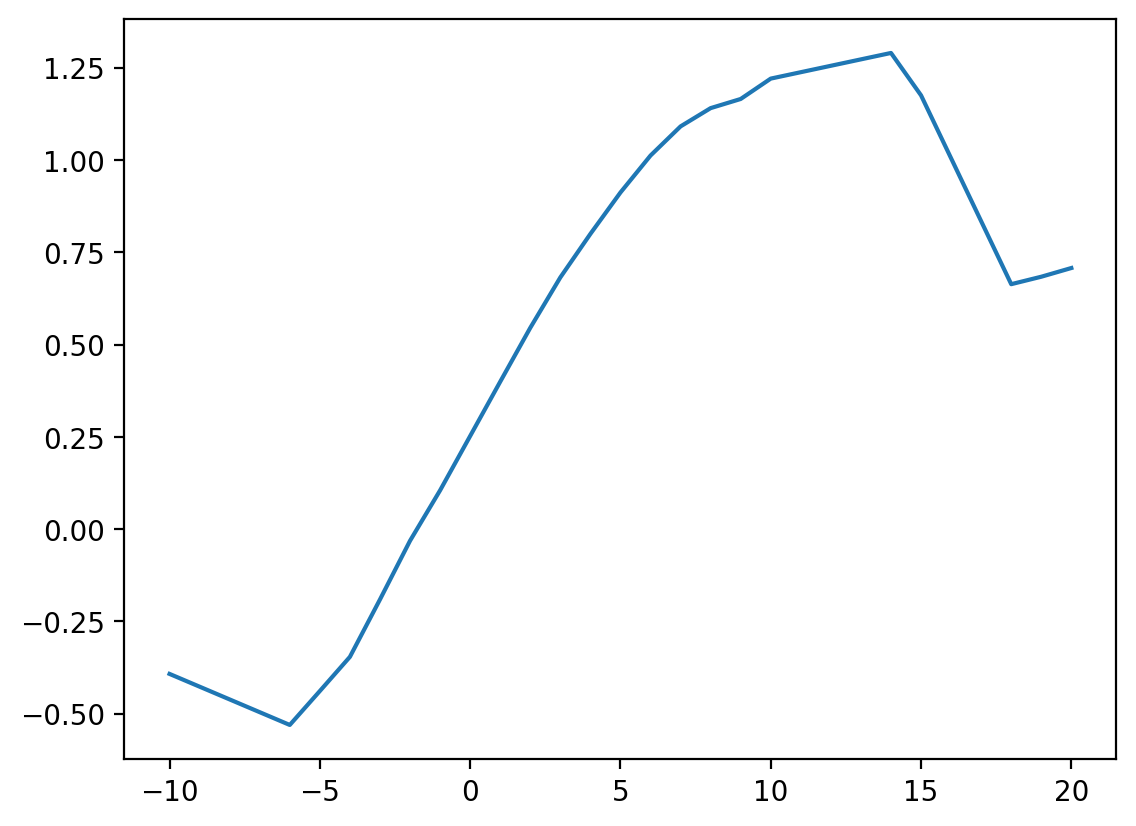

In [54]:
plt.plot([naca_polar_low[k]['alpha'] for k in naca_polar_low.keys()], [naca_polar_low[k]['CL'] for k in naca_polar_low.keys()], label = "naca")


In [64]:
naca_polar_low = comprehend_polar("naca_low_polar")
kt_polar_low = comprehend_polar("kt_low_polar")
naca_polar_high = comprehend_polar("naca_high_polar")
kt_polar_high = comprehend_polar("kt_high_polar")

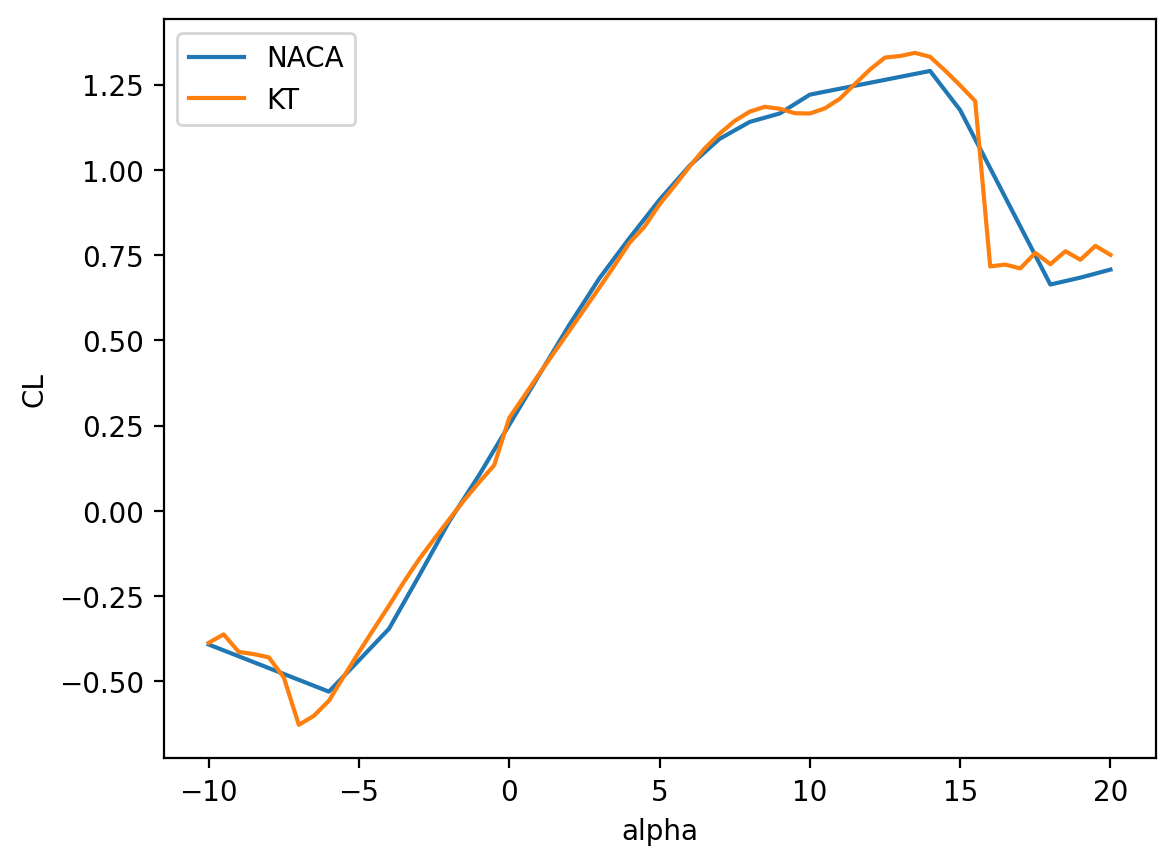

In [74]:
plot('alpha', 'CL', naca_polar_low, kt_polar_low)
plt.legend(["NACA", "KT"])
plt.savefig("cla_low.png")

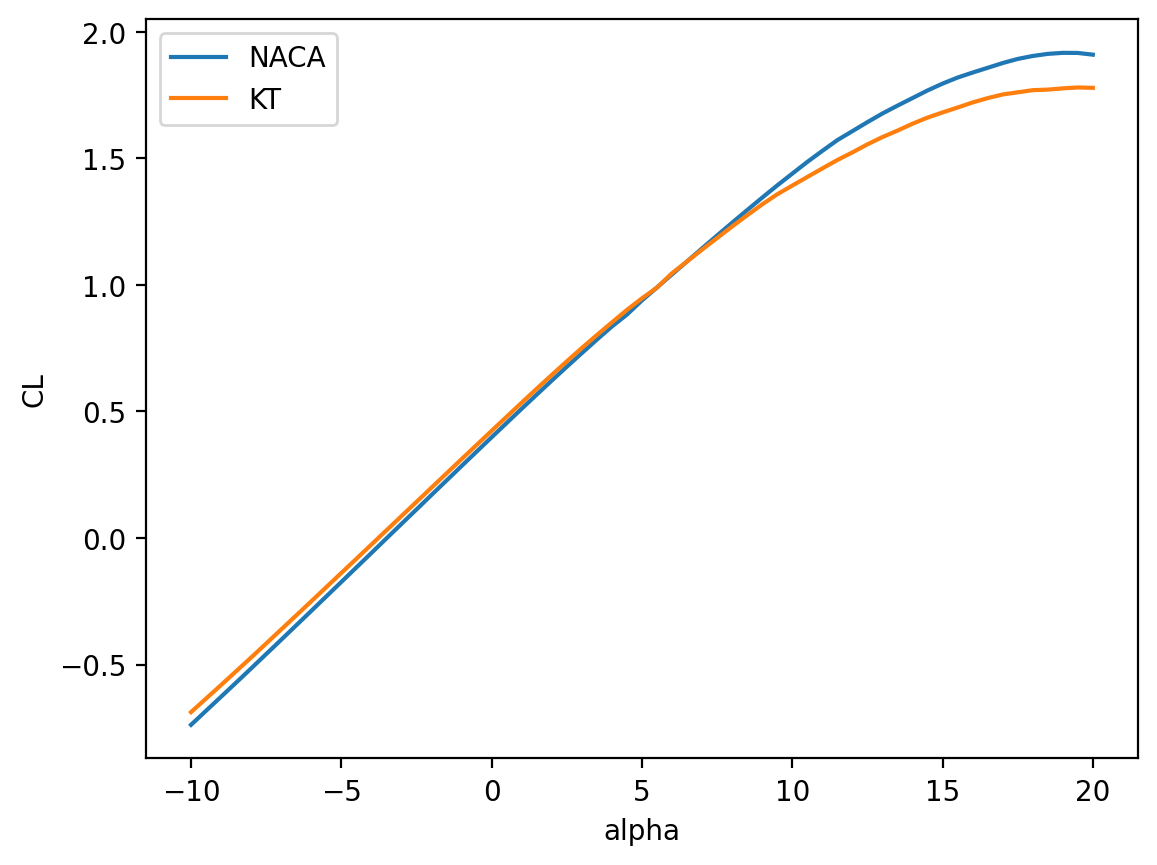

In [73]:
plot('alpha', 'CL', naca_polar_high, kt_polar_high)
plt.legend(["NACA", "KT"])
plt.savefig("cla_high.png")

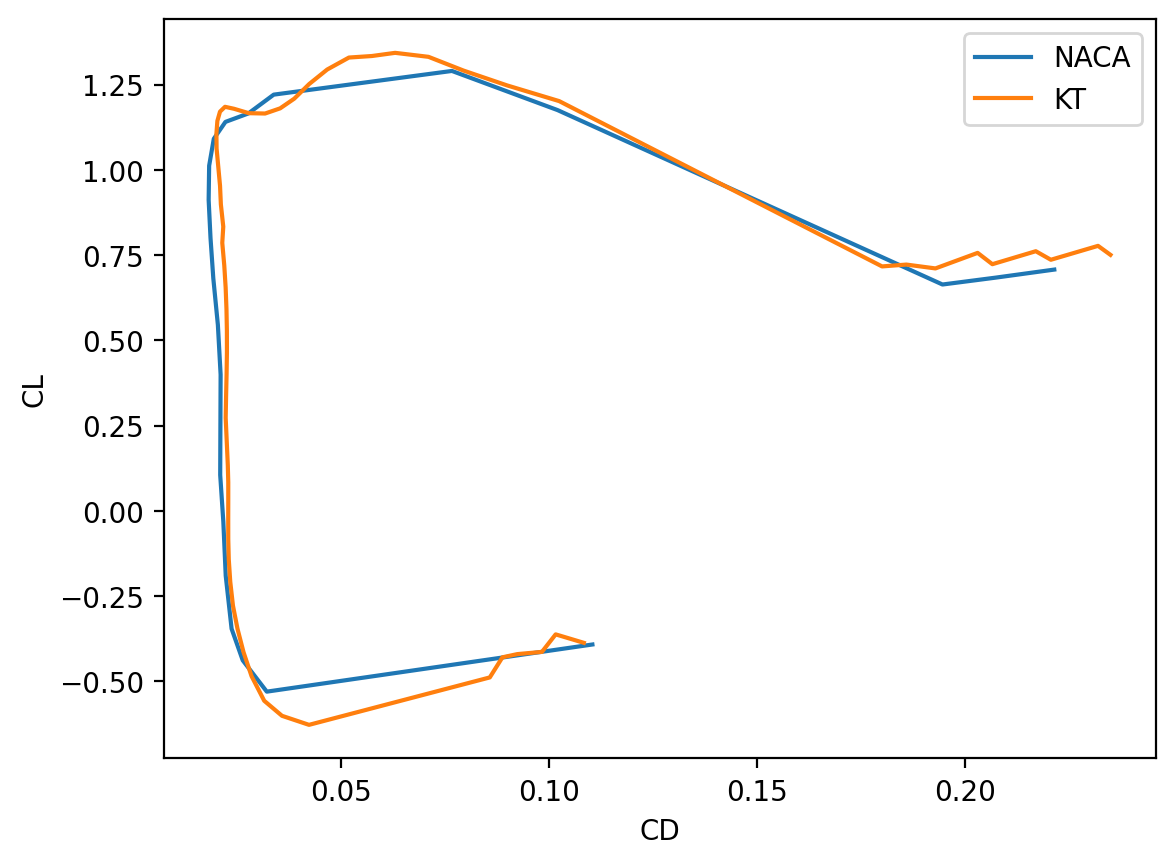

In [76]:
plot('CD', 'CL', naca_polar_low, kt_polar_low)
plt.legend(["NACA", "KT"])
plt.savefig("polar_low.png")

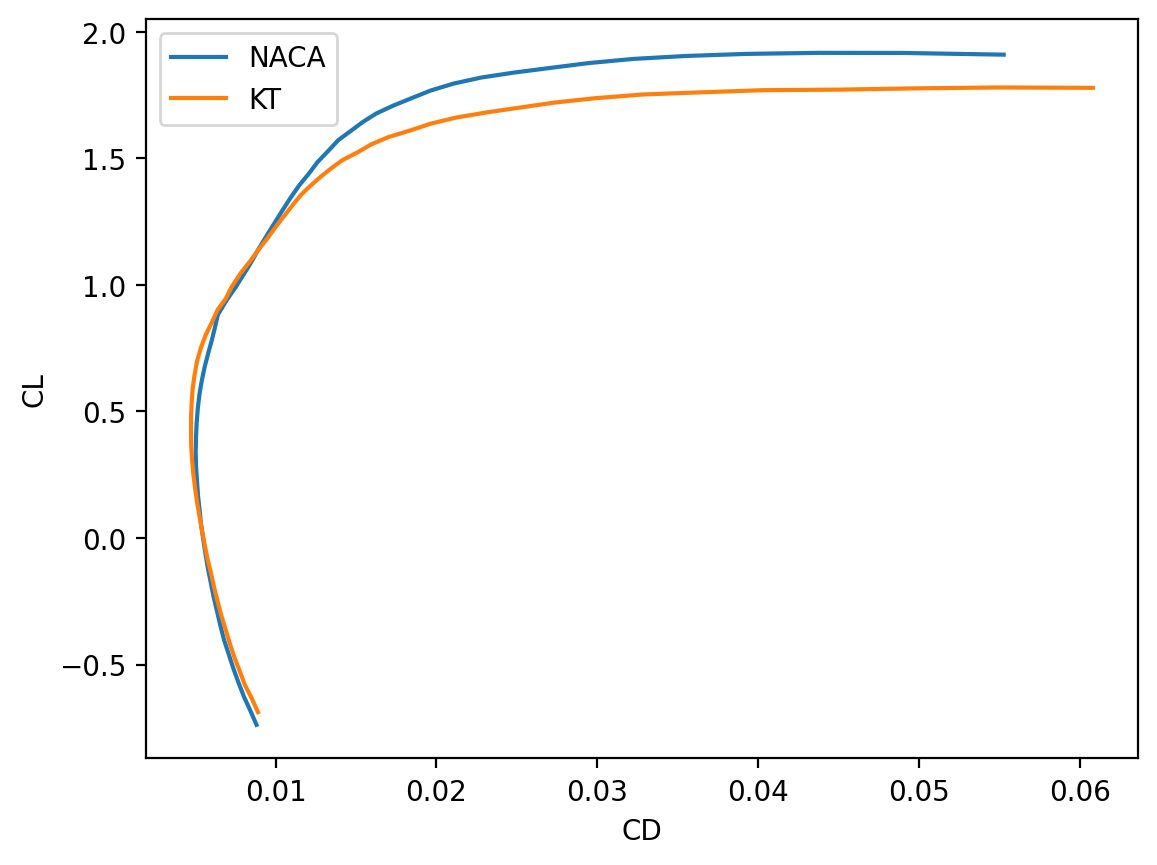

In [77]:
plot('CD', 'CL', naca_polar_high, kt_polar_high)
plt.legend(["NACA", "KT"])
plt.savefig("polar_high.png")